# Data Trained- Wine Data Set- Sudha Udayakumar

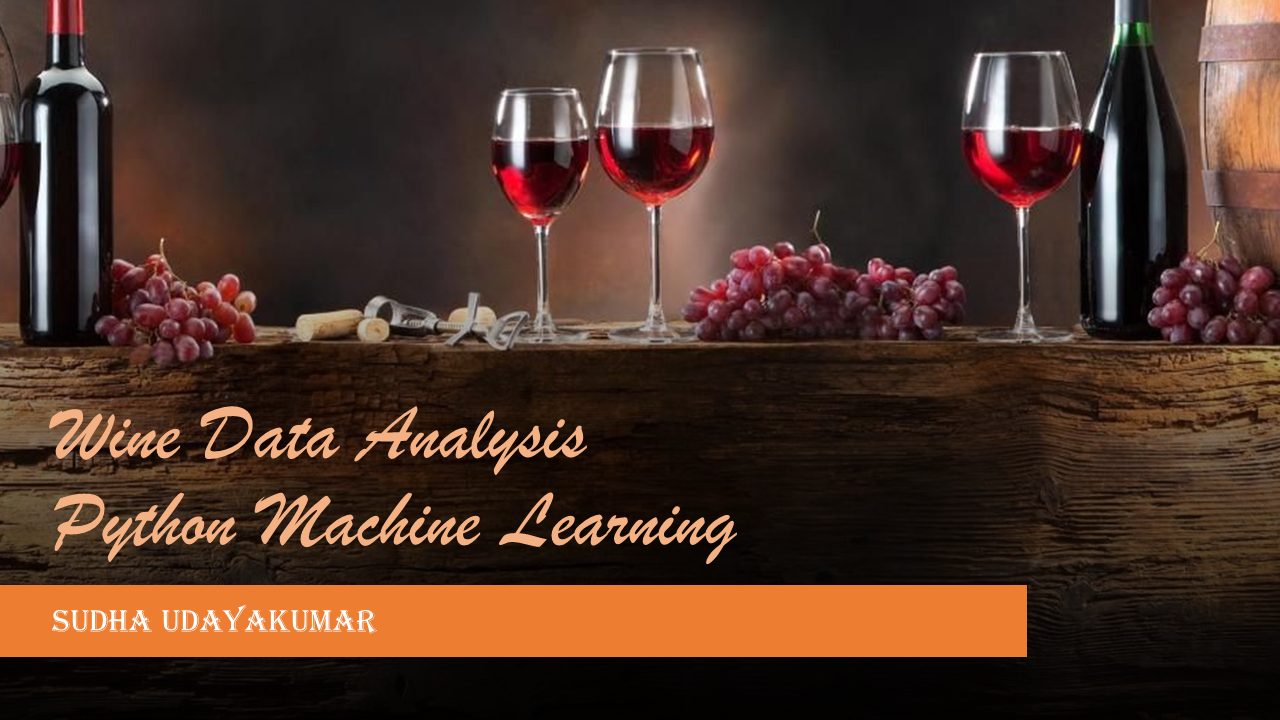

# Introduction (Define Problem)

## Problem Statement (Summarized)

# Choose Right Tools

## Importing and Installing the packages

In [1]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)       # To display all the data in each column
pd.set_option('display.precision', 3)               # To display values only upto three decimal places.
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale = 1.3, color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline


import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Handling warnings

In [2]:
warnings.filterwarnings('ignore') # ignore warnings.
%config IPCompleter.greedy = True # autocomplete feature.
pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.

# Loading data

In [3]:
 # Importing training dataset using pd.read_csv from github. Not saving the file locally 
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [4]:
#save the CSV file to a local folder, so that we can use it while uploading to Github
df.to_csv("wine.csv")

In [5]:
# to have a quick glance of data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5


<span style='background:yellow'> Observation: The table is loaded fully and we can see the data</span>

In [6]:
df.shape

(1599, 12)

<span style='background:yellow'>Observation: We have 1599 rows and 12 columns, its a small dataset  </span>

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

<span style='background:yellow'>Observation: Except the target column all others are Float </span>

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<span style='background:yellow'>Observation: There are no missing values </span>

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<span style='background:yellow'>Observation: Confirming if there are any null values and there are none </span>

In [11]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

<span style='background:yellow'>Observation: Only target column has less variables, all others have lot of values </span>

In [12]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<span style='background:yellow'>Observation: Though the Wine values is from 1 to 10, only few classes are avaiable. Only the Normal Wine class we have more data as well  </span>

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


<span style='background:yellow'>Observation: We can see there is wide range of data, so we might need to use Scaling techniques. There is no missing value as well </span>

# EDA

## Univariate Analysis

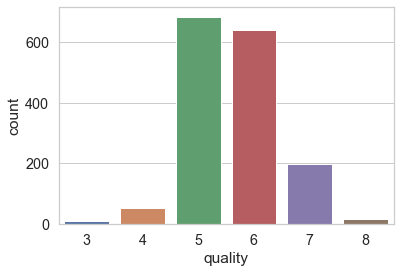

In [14]:
sns.countplot(df["quality"])

In [15]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<span style='background:yellow'>Observation: As per our intial analysis, wine data is impbalanced and the normal wine is highest </span>

## Bi-Variate Analysis

<span style='background:pink'>Notes: Now let us compare the Features with the Target Variable and do a deeper analysis </span>

In [16]:
features=df.drop(columns='quality')

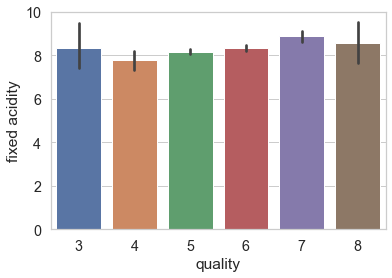

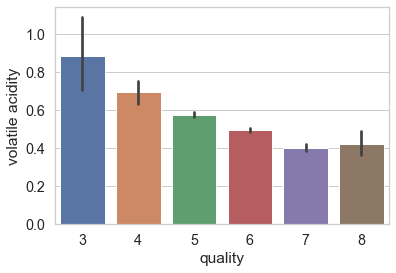

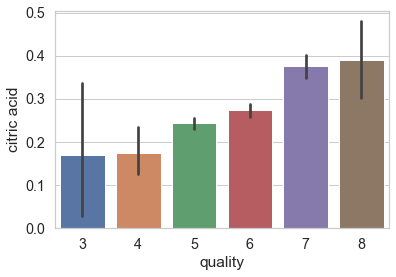

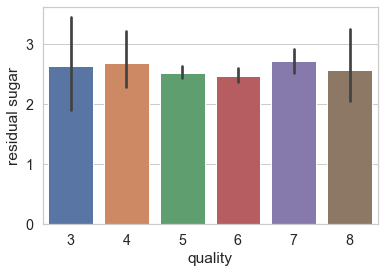

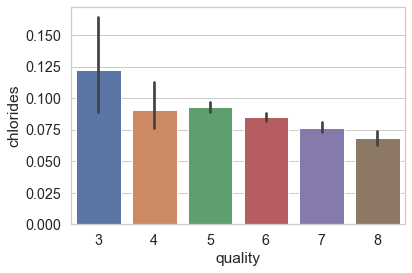

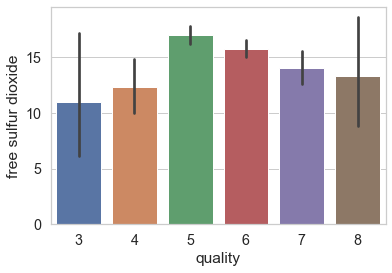

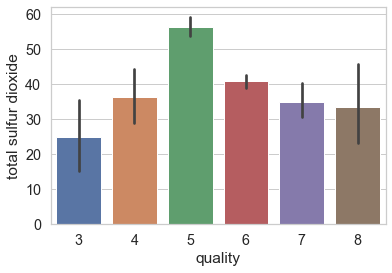

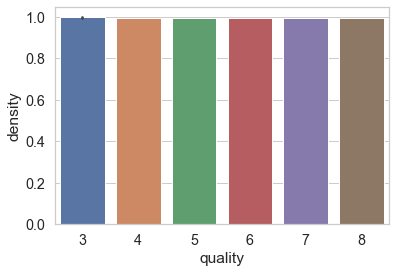

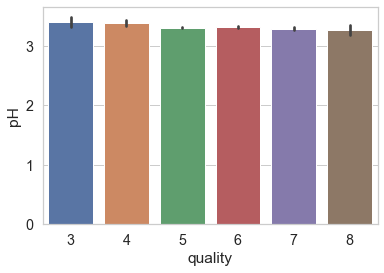

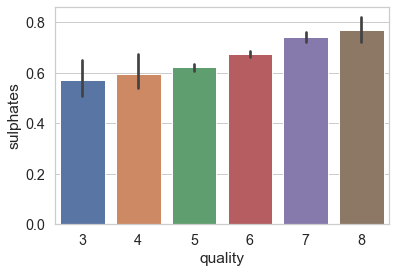

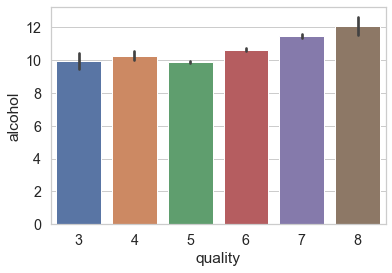

In [17]:

for col in features.columns:
    
    plt.figure()
    sns.barplot(x="quality",y=features[col],data=df)
     

plt.show()

<span style='background:yellow'>Observation: Fixed Acidity VS Quality: 
        Fixed acidity is highest in 7 quality of wine. However the fixed acidity range is 7+ for all quality of wine</span>

<span style='background:yellow'>Observation: Volatile Acidity VS Quality: 
        Volatiles acidity is highest in 3 and falls down linear till 7 quality of wine and slightly increases for type 8</span>

<span style='background:yellow'>Observation: Citric Acid VS Quality: 
        Citric Acid is reverse of Volatile Acidity. Quality 3 is the lowest and Quality 8 is the highest</span>

<span style='background:yellow'>Observation: Residual Sugar VS Quality: 
        Residual Sugar is almost the same for all wine categories</span>

<span style='background:yellow'>Observation: Chlories VS Quality: 
        Cholorides is highest for 3 and reduces till 8, with a small deviation in 4</span>

<span style='background:yellow'>Observation: Free Sulphur Dioxide VS Quality: 
        Highest for quality 5 & 6, and then 7&8, and 3&4. We can see some groups forming</span>

<span style='background:yellow'>Observation: Total Sulphur Dioxide VS Quality: 
        Similar to Free Sulphur Dioxide, we can see some patters. 5 & 6 are high, 7&8 are lower, 3&4 are another group</span>

<span style='background:yellow'>Observation: Density VS Quality: 
        Density is the same for all types of wine</span>

<span style='background:yellow'>Observation: Total pH VS Quality: 
       pH is the same for all types of wine</span>

<span style='background:yellow'>Observation: Sulphates VS Quality: 
        Sulphates increase from 3 to 8</span>

<span style='background:yellow'>Observation: Alcohol VS Quality: 
        Alcohol content is hiher in 7 & 8</span>

## Multi Variate Analysis

<span style='background:Pink'>Note: Let us find the co-relation , missing value from heat map. Also find the co-relation with heatmap and table.   </span>

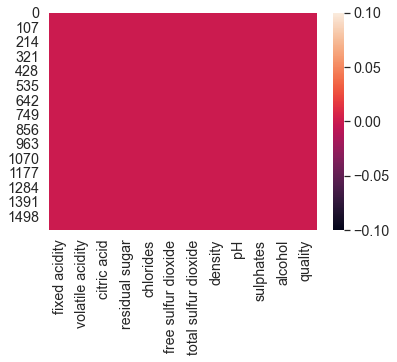

In [18]:
sns.heatmap(df.isnull())

In [19]:
dfcor=df.corr()
dfcor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


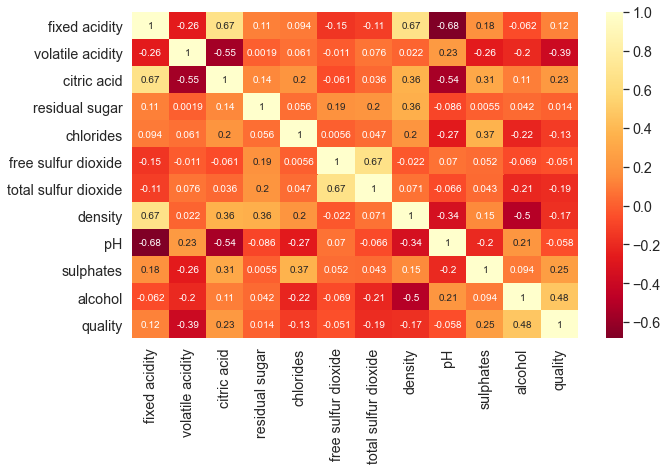

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

In [21]:
#even the heatmap was tough to analyse. So lets do it in a ascending order and correlate with the target variable"quality"
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=True)

volatile acidity       -0.39
total sulfur dioxide   -0.19
density                -0.17
chlorides              -0.13
pH                     -0.06
free sulfur dioxide    -0.05
residual sugar          0.01
fixed acidity           0.12
citric acid             0.23
sulphates               0.25
alcohol                 0.48
quality                 1.00
Name: quality, dtype: float64

<span style='background:yellow'>Observation: From the initial red heat map, there were no white dots which confirms no missing data. Residual Sugar has only 0.01 corelation with Quality, we can drop it as needed. Since the dataset is already small, dropping any values will impact. So lets retain the dataset as is </span>

# Outliers

In [22]:
collist=df.columns.values
collist

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

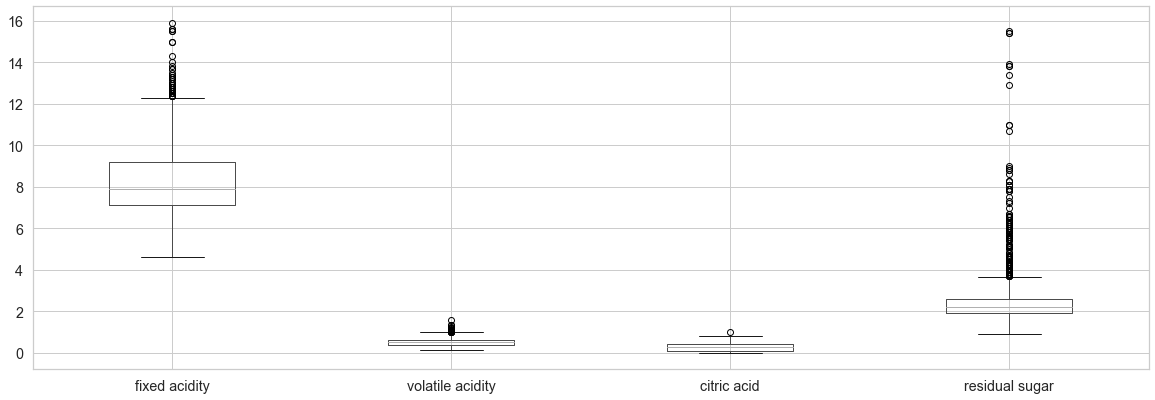

In [23]:
#plotting box plot for the 1st 5 columns
df.iloc[:,0:4].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

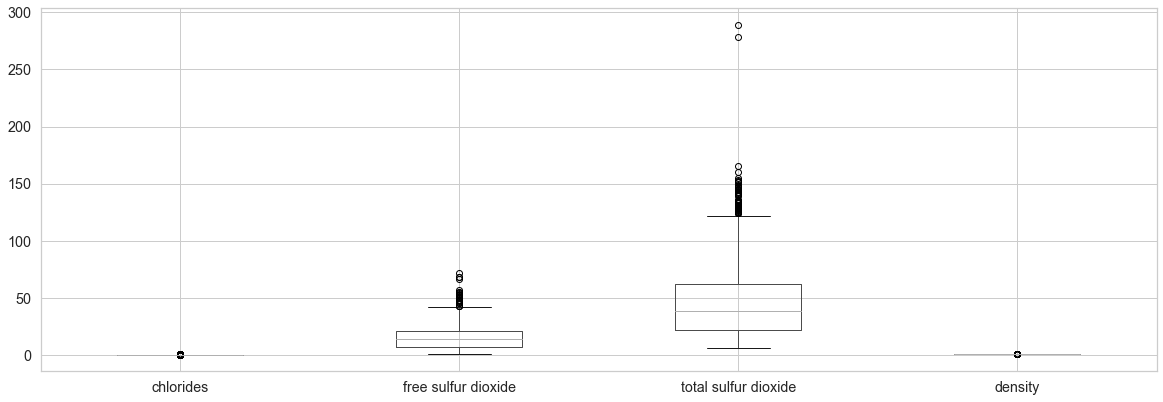

In [24]:
#plotting for the rest of the columns
df.iloc[:,4:8].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

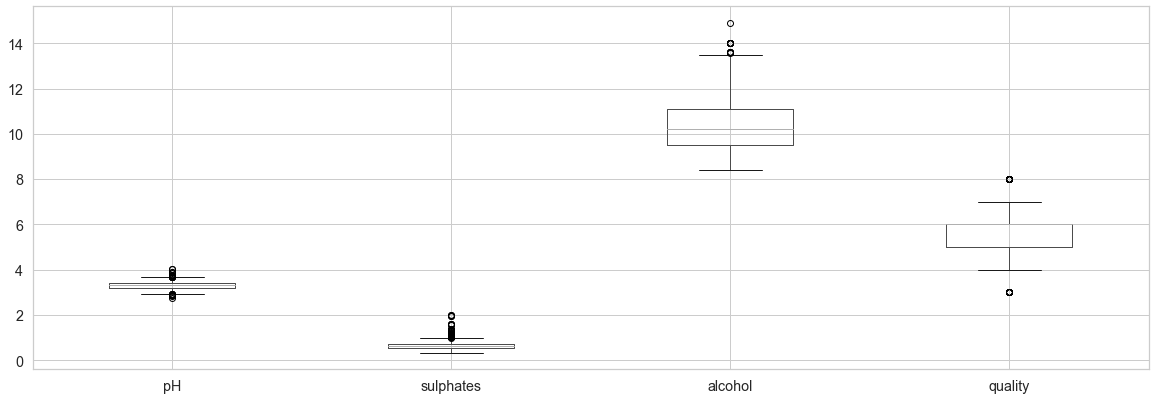

In [25]:
#plotting for the rest of the columns
df.iloc[:,8:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

<span style='background:yellow'>Observation: We see the presence of outliers in the box plot. They are presented as circles in the box plot </span>

# Outliers & Skewness

In [26]:
from scipy.stats import zscore
z=np.abs(zscore(df))

new_df=df[(z<3).all(axis=1)]


In [27]:
new_df.shape

(1451, 12)

In [28]:
df.shape

(1599, 12)

In [29]:
1599-1451

148

In [30]:
(148/1599)*100

9.255784865540964

<span style='background:yellow'>Observation: We are loosing close to 9% of data, which is very high for this small dataset, so lets analyse further </span>

In [31]:
new_df.nunique()

fixed acidity            84
volatile acidity        132
citric acid              78
residual sugar           67
chlorides               113
free sulfur dioxide      46
total sulfur dioxide    131
density                 401
pH                       78
sulphates                76
alcohol                  60
quality                   5
dtype: int64

<span style='background:yellow'>Observation: If we see the % of data is slightly ok to remove. however we have lost one type of quality of alcohol itself. We can see we have only 6 types, earlier it was 5 types. So we will not drop these values </span>

## Skewness Handling

In [32]:
df.skew()

fixed acidity          0.98
volatile acidity       0.67
citric acid            0.32
residual sugar         4.54
chlorides              5.68
free sulfur dioxide    1.25
total sulfur dioxide   1.52
density                0.07
pH                     0.19
sulphates              2.43
alcohol                0.86
quality                0.22
dtype: float64

<span style='background:yellow'>Observation: We still see some skewness, so lets remove the skewness using Power Transform  </span>

In [33]:
from sklearn.preprocessing import power_transform
skew_new=power_transform(df)

skew_new=pd.DataFrame(skew_new,columns=df.columns)

In [34]:
skew_new.skew()

fixed acidity           0.00
volatile acidity        0.00
citric acid             0.02
residual sugar         -0.02
chlorides              -0.15
free sulfur dioxide    -0.01
total sulfur dioxide   -0.00
density                -0.01
pH                     -0.00
sulphates               0.01
alcohol                 0.11
quality                 0.01
dtype: float64

In [35]:
skew_new.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [36]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

<span style='background:yellow'>Observation: Now we see our skewness is in the range of -0.5 to +0.5, so we are good to use the data. Also the quality still has 6 unique values, so we are good to use </span>

In [37]:
skew_new.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.45,-2.96,-1.53,-5.03,-6.62,-2.94,-2.43,-3.64,-4.05,-3.99,-3.08,-3.62
25%,-0.67,-0.75,-0.93,-0.60,-0.51,-0.90,-0.74,-0.60,-0.64,-0.68,-0.92,-0.78
50%,-0.09,0.06,0.04,-0.01,-0.02,0.09,0.03,0.01,0.02,-0.05,-0.02,0.47
75%,0.66,0.70,0.81,0.56,0.48,0.72,0.74,0.58,0.59,0.71,0.81,0.47
max,2.79,3.85,2.86,2.54,2.91,2.79,3.05,3.57,4.12,2.93,2.41,2.75


<span style='background:yellow'>Observation: The data looks fine and all columns are in similar range, so we need not use standard scalar. however lets use Standar scalar and double check  </span>


In [38]:
x=skew_new.drop("quality",axis=1)
y=skew_new["quality"]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.44,1.00,-1.53,-0.60,-0.17,-0.27,-0.12,0.56,1.28,-0.58,-1.08
1,-0.16,1.77,-1.53,0.56,0.79,0.99,0.85,0.04,-0.71,0.40,-0.50
2,-0.16,1.27,-1.26,0.15,0.56,0.19,0.54,0.14,-0.31,0.18,-0.50
3,1.52,-1.55,1.40,-0.60,-0.23,0.39,0.69,0.67,-0.98,-0.39,-0.50
4,-0.44,1.00,-1.53,-0.60,-0.17,-0.27,-0.12,0.56,1.28,-0.58,-1.08


In [39]:
y.nunique()

6

In [40]:
y.head()

0   -0.78
1   -0.78
2   -0.78
3    0.47
4   -0.78
Name: quality, dtype: float64

<span style='background:yellow'>Observation: The moment we apply skewness we see the target variable values are changed, so it will affect our data. So we will not apply skewness to our data as well </span>

# Handling the Target Variable

In [41]:
df["quality"].value_counts(ascending=True)

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

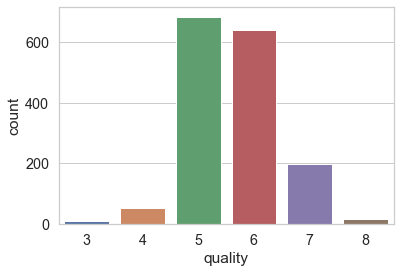

In [42]:
sns.countplot(df["quality"])

<span style='background:Pink'>Note:  From the Problem Statement:The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones).                                                                    What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value. </span>

<span style='background:yellow'>Observation: From the given problem statement, we can make the following assumptions
    1. normal wines- highest wine group- so group 5 & 6
    2. Excellent wines- group 7 & 8 (as they are ordered )
    3. Poor wines- group 3 & 4 (as per order and problem statement) </span>

## Bin the target Variable

In [43]:
bins = (0,4,6,8)
classs = ['poor', 'normal','excellent']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = classs)

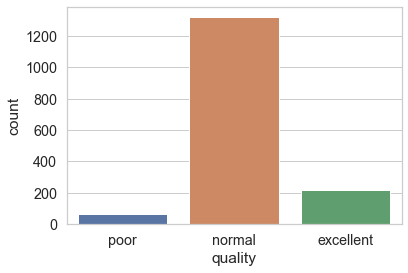

In [44]:
sns.countplot(df["quality"])

In [45]:
df["quality"].value_counts()

normal       1319
excellent     217
poor           63
Name: quality, dtype: int64

<span style='background:yellow'>Observation: From the above value counts and count plot, we can see our binning of data has worked as expected  </span>

# Transforming Data before Model Building

<span style='background:Pink'>Note: Features-X: We need to do standard scaling and bring them to same scale. e.g. density range is 1, and Total Sulphur dioxide is very high, so need to bring them to a standard Scalar   </span>

<span style='background: pink'>Notes: Target-Y: Since we created 3 classification for the Quality, we need to do labelencoding before using on the model  </span>

<span style='background:pink'>Note: So to do the above, lets split our data into X & Y  </span>

In [46]:
x=df.drop("quality",axis=1)
y=df["quality"]
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40


In [47]:
y.head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: quality, dtype: category
Categories (3, object): [poor < normal < excellent]

In [48]:
y.value_counts()

normal       1319
excellent     217
poor           63
Name: quality, dtype: int64

## Standard Scalar for X

In [49]:

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(x)

In [50]:
scaledX

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [51]:
features=pd.DataFrame(scaledX)
features.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.14,-2.28,-1.39,-1.16,-1.60,-1.42,-1.23,-3.54,-3.70,-1.94,-1.90
25%,-0.70,-0.77,-0.93,-0.45,-0.37,-0.85,-0.74,-0.61,-0.66,-0.64,-0.87
50%,-0.24,-0.04,-0.06,-0.24,-0.18,-0.18,-0.26,0.00,-0.01,-0.23,-0.21
75%,0.51,0.63,0.77,0.04,0.05,0.49,0.47,0.58,0.58,0.42,0.64
max,4.36,5.88,3.74,9.20,11.13,5.37,7.38,3.68,4.53,7.92,4.20


<span style='background:yellow'>Observation: As discussed above as in example, Density was 1 and Total Sulphurdioxide was high, now all features are in standard range   </span>

## Label Encoder - Target Variable- Y

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['quality'] = le.fit_transform(df['quality'])


In [53]:
df['quality'].value_counts()

1    1319
0     217
2      63
Name: quality, dtype: int64

# Model BUilding

## Splitting into Train & Test Data

In [54]:
x=features
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.53,0.96,-1.39,-0.45,-0.24,-0.47,-0.38,0.56,1.29,-0.58,-0.96
1,-0.30,1.97,-1.39,0.04,0.22,0.87,0.62,0.03,-0.72,0.13,-0.58
2,-0.30,1.30,-1.19,-0.17,0.10,-0.08,0.23,0.13,-0.33,-0.05,-0.58
3,1.65,-1.38,1.48,-0.45,-0.26,0.11,0.41,0.66,-0.98,-0.46,-0.58
4,-0.53,0.96,-1.39,-0.45,-0.24,-0.47,-0.38,0.56,1.29,-0.58,-0.96


In [55]:
y=df["quality"]

## Importing Libraries for Model Building

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Splitting Into Train & Test data

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=43,stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [58]:
y_train.value_counts()

1    1055
0     174
2      50
Name: quality, dtype: int64

In [59]:
y_test.value_counts()

1    264
0     43
2     13
Name: quality, dtype: int64

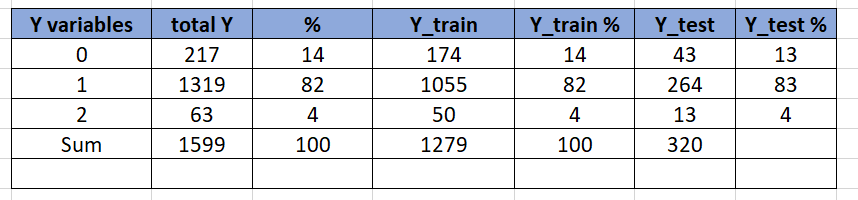

<span style='background:yellow'>Observation: By using Stratify we see the Y variables % split is the same on the total, y_train & y_test. This is done for imbalanced dataset, so that the model is trained and tested as per the original </span>

### Building Model in 2 ways

### Finding Best Random State

In [60]:

from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best accuracy is ", maxAccu,"on Random_state  ",maxRs)

Best accuracy is  0.8598484848484849 on Random_state   172


<span style='background:yellow'>Observation: Let us use the best random state identified in our model building  </span>

#### Method-1

### Instantiating the Model

In [61]:
# Since this is a Classification dataset, lets use the following Algos and instantiate them

gnb=GaussianNB()
rf=RandomForestClassifier(n_estimators=100)
ad=AdaBoostClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
sv=SVC()

#### Building models and printing the evaluation Score

In [62]:
model=[gnb,rf,ad,dtc,sv]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("\n Accuracy score: of ",m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    precision=precision_score(y_test,pred,average='weighted')
    recall=recall_score(y_test,pred,average='weighted')
    print(score)
    print("mean of cross val with scoring= accuarcy:",score.mean())
    print("precision:",precision.mean())
    print("recall",recall.mean())
    print("mean of cross val with scoring= auc roc :",cross_val_score(m,x,y,cv=5,scoring="roc_auc_ovr").mean())
    print("***************************************")


 Accuracy score: of  GaussianNB()
0.7803030303030303
[[ 49  24   0]
 [ 57 358  11]
 [  1  23   5]]
              precision    recall  f1-score   support

           0       0.46      0.67      0.54        73
           1       0.88      0.84      0.86       426
           2       0.31      0.17      0.22        29

    accuracy                           0.78       528
   macro avg       0.55      0.56      0.54       528
weighted avg       0.79      0.78      0.78       528

[0.8        0.665625   0.8375     0.646875   0.81504702]
mean of cross val with scoring= accuarcy: 0.7530094043887148
precision: 0.7936654725473845
recall 0.7803030303030303
mean of cross val with scoring= auc roc : 0.7670428641038564
***************************************

 Accuracy score: of  RandomForestClassifier()
0.8295454545454546
[[ 23  50   0]
 [ 11 415   0]
 [  1  28   0]]
              precision    recall  f1-score   support

           0       0.66      0.32      0.43        73
           1       0.84

#### Method -2 Building model and printing the evaluation score in a table

In [63]:
modelList=[("Dec Tree Classifier", dtc),("Random Forest Class",rf),("Naive Bayes-G", gnb),("Ada Boost Classi",ad)]

def GetAccuracy(x,y,modelList):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=92)
    ModelName= []
    modelAccuracy=[]
    modelCrossval=[]
    AccuracyCVDiff=[]
    Precision=[]
    Recall=[]
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(x_train,y_train)
        pred=modelInstance.predict(x_test)
        accuracy=f1_score(y_test,pred,average='weighted')
        modelAccuracy.append(accuracy)
        precision=precision_score(y_test,pred,average='weighted')
        Precision.append(precision)
        recall=recall_score(y_test,pred,average='weighted')
        Recall.append(recall)
        crossAcc=cross_val_score(modelInstance,x,y,cv=5,scoring="roc_auc_ovo").mean()
        modelCrossval.append(crossAcc)
        AccuracyCVDiff.append(accuracy-crossAcc)
    df_acc=pd.DataFrame({"Name":ModelName,
                         "F1": modelAccuracy,
                         "Precision":Precision,
                         "Recall" :Recall,
                         "CrossValidation RoC_AUC":modelCrossval,
                          "Difference in F1 & ROCAUCCV": AccuracyCVDiff
                        })
    return df_acc
GetAccuracy(x,y,modelList)



,Name,F1,Precision,Recall,CrossValidation RoC_AUC,Difference in F1 & ROCAUCCV
0,Dec Tree Classifier,0.84,0.85,0.83,0.60,0.24
1,Random Forest Class,0.88,0.87,0.90,0.80,0.08
2,Naive Bayes-G,0.82,0.84,0.80,0.77,0.04
3,Ada Boost Classi,0.79,0.82,0.76,0.73,0.06


<span style='background:yellow'>Observation: When we use Random Forest Classifier, the F1 is improved. As well
    as the Precision, Recall, Cross Validation(AUCROC). Random forest is an ensemble learning method that builds multiple decision trees and then gets a prediction based on what the majority of decision trees predict</span>

# Hyper Parameter Tuning

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameters ={"max_depth": range(2,6),
              "min_samples_split": range(6, 11),
              "min_samples_leaf": range(1, 5),
              "bootstrap": [True,False],
              "criterion" : ["gini", "entropy"],              
             }

In [66]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [67]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 6),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(6, 11)})

In [68]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [83]:
mod=RandomForestClassifier(criterion='entropy',max_depth=12,random_state=172,min_samples_split =6,bootstrap=True)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(f1_score(y_test,pred,average='weighted')*100)

78.16392932723262


<span style='background:yellow'>Observation: Tried more than 100 combinations, but the F1 score did not improve with Hyper Parameter Tuning. Also since the datset is small Gridsearch CV is good. Random Search CV was not used as it was a small dataset  </span>

# Saving the model

In [70]:
import joblib
joblib.dump(mod,"winemodel.pkl")

['winemodel.pkl']

# Loading the model

In [71]:
model=joblib.load("winemodel.pkl")

In [72]:
prediction=model.predict(x_test)

In [73]:
print(f1_score(y_test,pred,average='weighted')*100)

78.15360743579728


In [74]:
prediction=pd.DataFrame(prediction) #converting to a Data Frame

In [75]:
prediction.head()  #checking the top 5 values, to double check fi there are predictions

,0
0,1
1,1
2,1
3,1
4,1


In [76]:
prediction.to_csv('WineResults.csv') #saving the prediction

<span style='background:pink'>Note:Save & Load the model. Saved the model and before handing over, just loaded & test the model to see if its working fine
    if the accuracy is the same and predictions are coming up. All were working fine   </span>


# Conclusion